### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [162]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [163]:
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.



In [164]:
data = pd.read_csv('data/coupons.csv')

In [165]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [166]:
#Better understand data types and size of table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [167]:
#Identify missing values
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [168]:
#Identify duplicates
duplicates = data[data.duplicated]
len(duplicates)

74

In [169]:
#Understand values of "object" type columns that are expected to be integers or floats
data.value_counts("age")

,count
age,
21,2653
26,2559
31,2039
50plus,1788
36,1319
41,1093
46,686
below21,547


In [170]:
#Understand values of "object" type columns that are expected to be integers or floats
data.value_counts("income")
# The columns "age" and "income" are objects as they contain categorical values at the boundaries. For now, we will keep these column types as is unless further transformation is needed subsequently in the analysis

,count
income,
$25000 - $37499,2013
$12500 - $24999,1831
$37500 - $49999,1805
$100000 or More,1736
$50000 - $62499,1659
Less than $12500,1042
$87500 - $99999,895
$75000 - $87499,857
$62500 - $74999,846


3. Decide what to do about your missing data -- drop, replace, other...

In [171]:
#Convert number of missing data to %
data.isnull().sum()/len(data)*100

,0
destination,0.000000
passanger,0.000000
weather,0.000000
temperature,0.000000
time,0.000000
coupon,0.000000
expiration,0.000000
gender,0.000000
age,0.000000
maritalStatus,0.000000


In [172]:
# We see that 99% of the car data is missing. This data is likely not helpful to maintain and will be dropped.
data = data.drop("car", axis = 1)

In [173]:
#Here we better understand the characteristics of the bar, coffehouse, carryaway, restaurantlessthan20, restaurant20to50 columns to inform how to best address the missing values
freq_value = data[["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]].describe(include=["object"])
freq_value

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12577,12467,12533,12554,12495
unique,5,5,5,5,5
top,never,less1,1~3,1~3,less1
freq,5197,3385,4672,5376,6077


In [174]:
#The percent of missing values for the Bar, Coffehouse, CarryAway, RestaurantLessThan20 and Restaurant20to50 is less than 2% of total data. To preserve as much data as possible, we will impute the missing fields of a given column with the most frequent value of that column
top_Val = {col : freq_value[col]["top"] for col in ["Bar", "CoffeeHouse","CarryAway", "RestaurantLessThan20",  "Restaurant20To50"]}
data = data.fillna(top_Val)

#Verify all null values have been replaced
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [175]:
#Duplicates: We had previously identified 74 duplicate rows. While likelihood of having duplicates across certain attributes is normal e.g. "Weather, temp, time, gender". It seems unlikely to have real duplicates across every signle attributes. For this reason, we remove the current duplicates from the dataset
data = data.drop_duplicates()
len(data)

12610

4. What proportion of the total observations chose to accept the coupon?



In [176]:
#% of total observations that chose to accept the coupon
total_accepted = round (data["Y"].sum()/len(data), 2)
print(f"Percent of participants that accepted coupon is: {total_accepted:.0%}")

Percent of participants that accepted coupon is: 57%


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Count of Various Types of Offered Coupons')

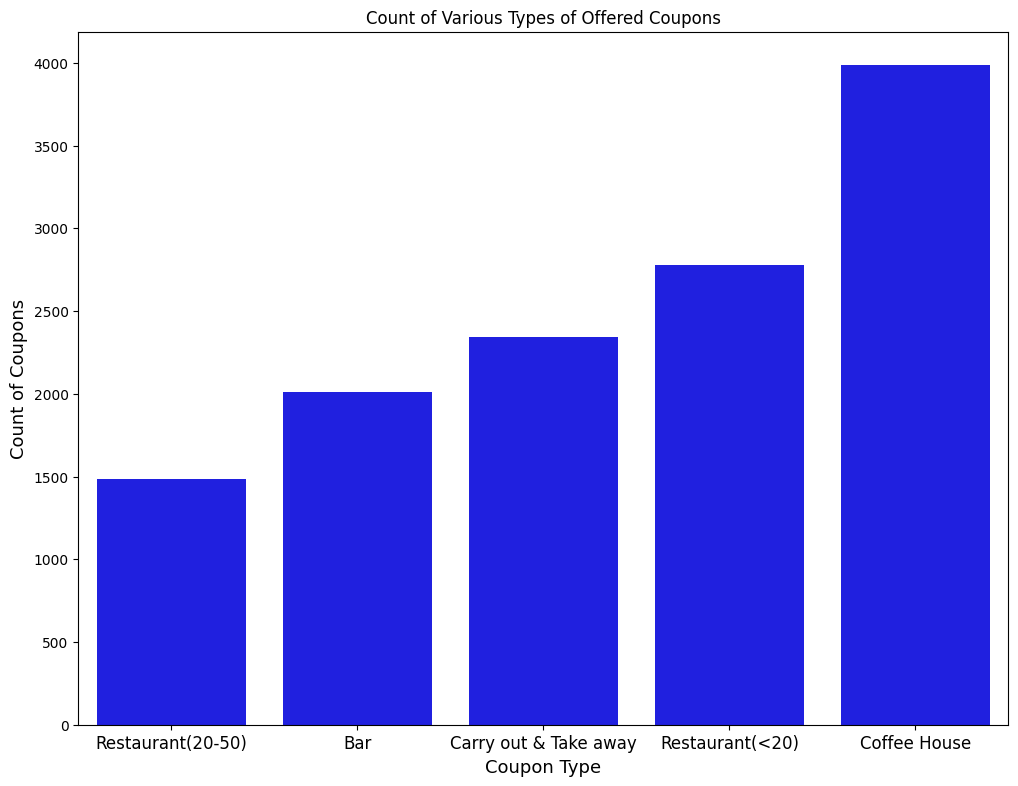

In [177]:
# Types of offered coupons
sorted = data ["coupon"].value_counts(ascending = True).index
plt.figure(figsize = (12, 9))
sns.countplot(data = data, x = "coupon", color = "blue", order = sorted)
plt.xticks(fontsize=12)
plt.xlabel("Coupon Type", fontsize = 13)
plt.ylabel ("Count of Coupons", fontsize = 13)
plt.title("Count of Various Types of Offered Coupons")

Text(0.5, 1.0, 'Count of Various Types of Offered Coupons split by whether they were accepted (Y = 1) or not (Y = 0)')

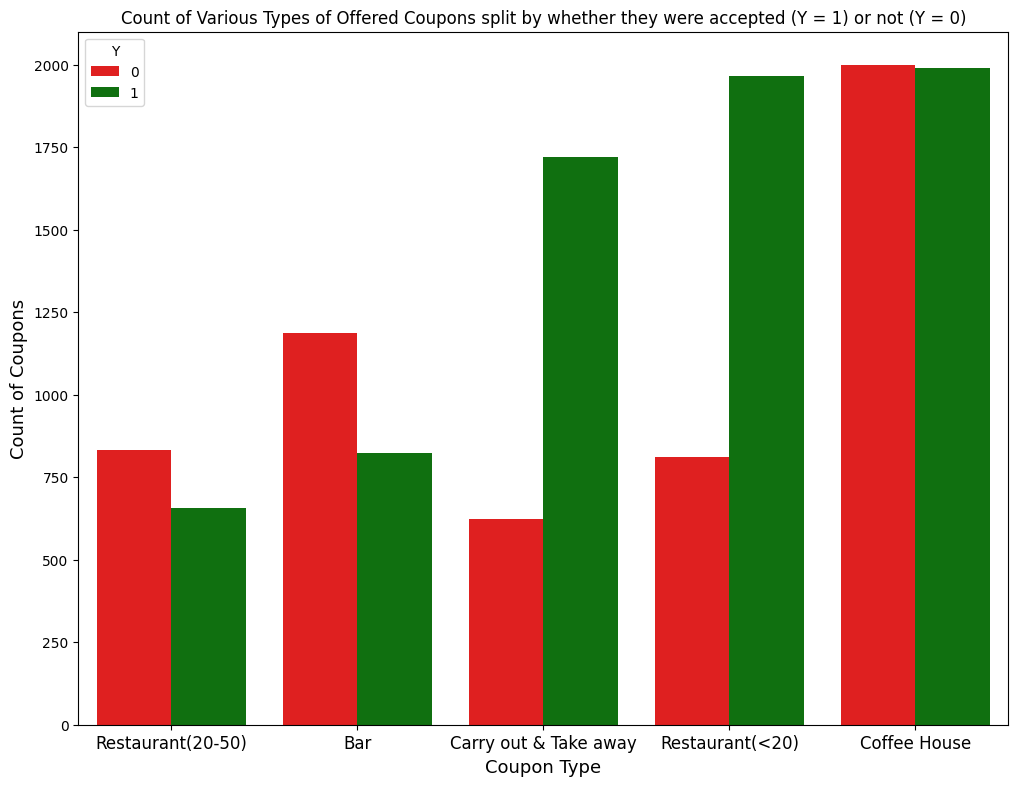

In [178]:
#Visualizing the coupon column and whether a coupon was accepted or not
plt.figure(figsize = (12, 9))
palette = { 0: "Red", 1: "Green"}
sns.countplot(data = data, x = "coupon", color = "brown", order = sorted, hue = "Y", palette = palette)
plt.xticks(fontsize=12)
plt.xlabel("Coupon Type", fontsize = 13)
plt.ylabel ("Count of Coupons", fontsize = 13)
plt.title("Count of Various Types of Offered Coupons split by whether they were accepted (Y = 1) or not (Y = 0)")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Distribution')

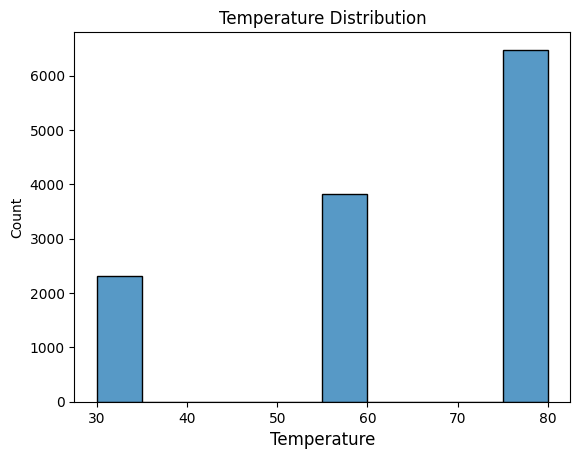

In [179]:
sns.histplot(data, x = "temperature", bins = 10)
plt.xlabel("Temperature", fontsize = 12)
plt.title("Temperature Distribution")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [180]:
data_bar = data.query('coupon == "Bar"')
data_bar.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
871,Home,Alone,Sunny,55,6PM,Bar,1d,Female,26,Unmarried partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
893,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Single,...,less1,4~8,1~3,less1,1,0,0,1,0,0
9755,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,50plus,Married partner,...,less1,4~8,1~3,1~3,1,0,0,0,1,0
1734,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Married partner,...,less1,less1,gt8,1~3,1,0,0,1,0,0
11743,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,21,Unmarried partner,...,gt8,4~8,4~8,less1,1,1,0,0,1,1
5005,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,31,Married partner,...,never,1~3,gt8,1~3,1,0,0,0,1,1
6686,Work,Alone,Rainy,55,7AM,Bar,1d,Male,21,Single,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
9768,Work,Alone,Sunny,30,7AM,Bar,1d,Female,50plus,Married partner,...,less1,4~8,1~3,1~3,1,1,0,1,0,0
12022,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Single,...,less1,less1,less1,less1,1,1,0,0,1,1
12109,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,36,Married partner,...,1~3,4~8,4~8,4~8,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [181]:
#% of bar coupons that were accepted
bar_accepted = round (data_bar["Y"].sum()/len(data_bar), 2)
print(f"Percent of bar coupons that were accepted is: {bar_accepted:.0%}")

Percent of bar coupons that were accepted is: 41%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [182]:
#Rate of acceptance based on number of bar visits:
data_bar.value_counts("Bar")
rate_visted_lessthan3 = data_bar.query('Bar == "never" or Bar == "less1" or Bar == "1~3"')["Y"].mean().round(2)
rate_visted_morethan4 = data_bar.query('Bar == "4~8" or Bar == "gt8"')["Y"].mean().round(2)
print(f"Acceptance rate for those that went to a bar 3 or fewer times: {rate_visted_lessthan3:.0%}")
print(f"Acceptance rate for those that went to a bar 4 or more time: {rate_visted_morethan4:.0%}")

## --> Those that tend to frequent bars are much more likely to accept the bar coupon

Acceptance rate for those that went to a bar 3 or fewer times: 37%
Acceptance rate for those that went to a bar 4 or more time: 77%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [183]:
data_bar.value_counts("age")
rate_morethanonce_lessthan25 = data_bar.query('age == "21" or age == "below21"').query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"')["Y"].mean()
rate_morethanonce_morethan25 = 1- rate_morethanonce_lessthan25
print(f"Drivers that are over the age of 25 are {rate_morethanonce_morethan25:.0%} likely to accept the coupon, whereas those that are younger than 25 are {rate_morethanonce_lessthan25:.0%} likely to accept the coupon")

## --> The younger the participant is the more likely they will accept the bar coupon given they tend to visit bars at least once

Drivers that are over the age of 25 are 33% likely to accept the coupon, whereas those that are younger than 25 are 67% likely to accept the coupon


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [184]:
data_bar_sub5 = data_bar.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"').query('passanger == "Friend(s)" or passanger == "Partner"').query('occupation != "Farming Fishing & Forestry"')
rate5 = data_bar_sub5["Y"].mean()
print(f"Drivers who go to a bar more than once a month and have passengers other than kids (and occupations other than farming, fishing or forestry) are {rate5:.0%} likely to accept bar coupon")
## Note occupation here doesnt have an impact

Drivers who go to a bar more than once a month and have passengers other than kids (and occupations other than farming, fishing or forestry) are 72% likely to accept bar coupon


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [185]:
# calculating acceptance rate of those of go to bar more than once, had passengers that were not a kid and not widowed:
data_bar_sub6_1 = data_bar.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"').query('passanger == "Friend(s)" or passanger == "Partner"').query('maritalStatus != "Widowed"')
rate6_1 = data_bar_sub6_1["Y"].mean()
print(f"Drivers who go to a bar more than once a month, have passengers other than kids and are not widowed are {rate6_1:.0%} likely to accept bar coupon")


# calculating acceptance rate of those that go to a bar more than once amonth and are under age of 30
data_bar_sub6_2 = data_bar.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"').query('age == "21" or age == "below21" or age == "26"')
rate6_2 = data_bar_sub6_1["Y"].mean()
print(f"Drivers who go to a bar more than once a month and are under 30 are {rate6_2:.0%} likely to accept bar coupon")


# calculating acceptance rate of those that go to cheap restaurants more than 4 times a month and income less than 50k
data_bar_sub6_3 = data_bar.query('RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8"').query('income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$37500 - $49999"')
rate6_3 = data_bar_sub6_3["Y"].mean()
print(f"Drivers who go to cheap restaurants more than 4 times and earn less than 50k are {rate6_3:.0%} likely to accept bar coupon")


Drivers who go to a bar more than once a month, have passengers other than kids and are not widowed are 72% likely to accept bar coupon
Drivers who go to a bar more than once a month and are under 30 are 72% likely to accept bar coupon
Drivers who go to cheap restaurants more than 4 times and earn less than 50k are 45% likely to accept bar coupon


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accepted that bar coupon tend to be ones that frequent bars at least once a month (69% acceptance rate), with those going more than 4 times being very highly likely to accept the coupon (77% acceptance rate).

Additional driver characteristics that increase their likelyhood of accepting include having passengers in the car other than kids, older than 21, and drivers that go less frequently to cheap restaurants

****

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Additional exploration around the data itself:
Was there a bias in who was offered a certain type of?**

In [186]:
#For the section below, we refer to columns as driver/driving attributes

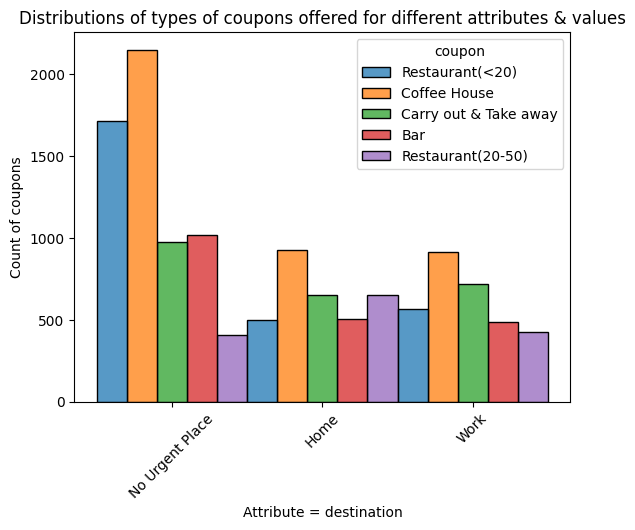

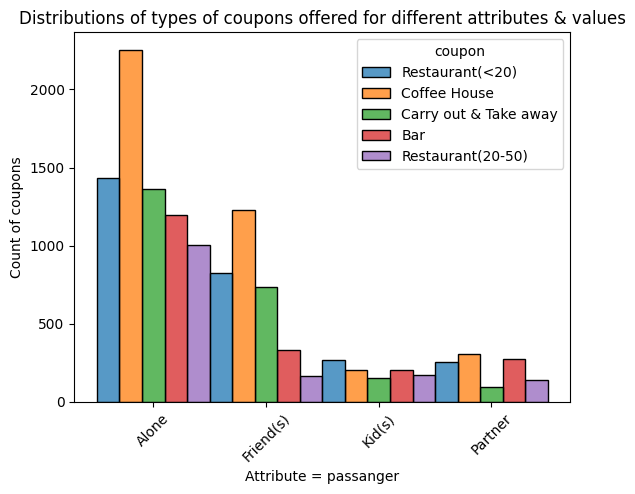

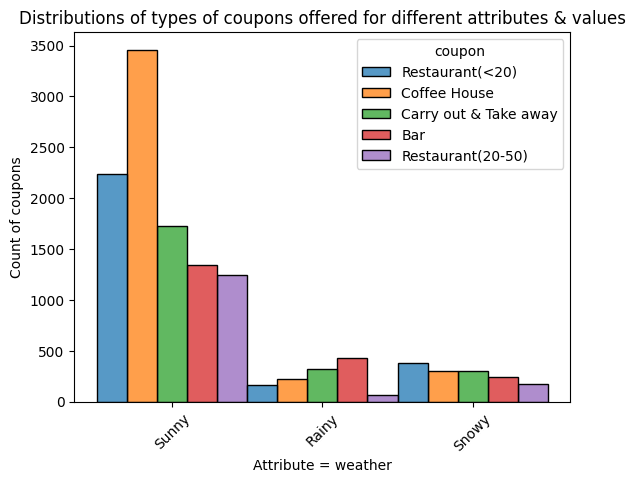

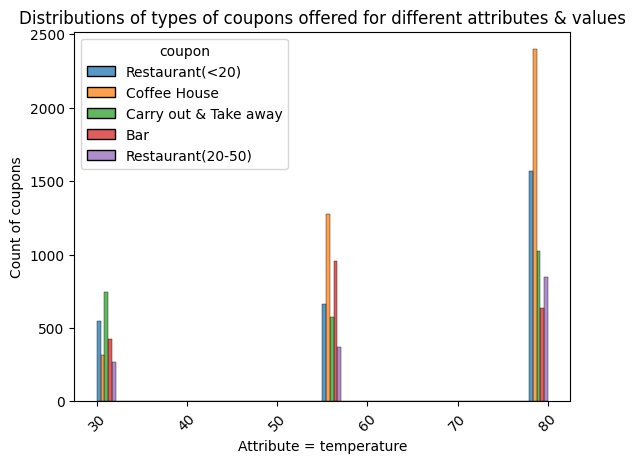

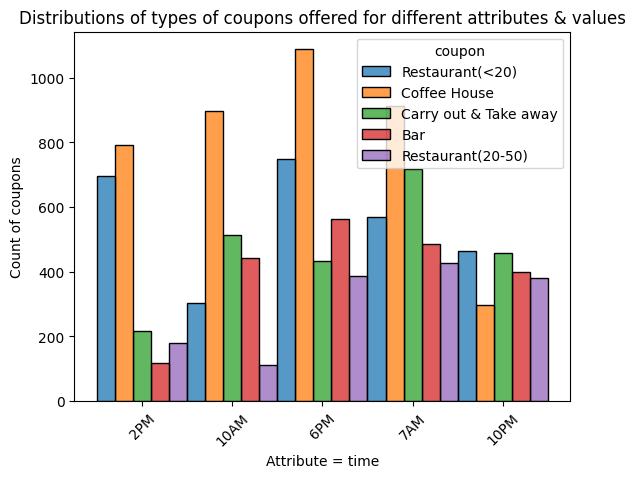

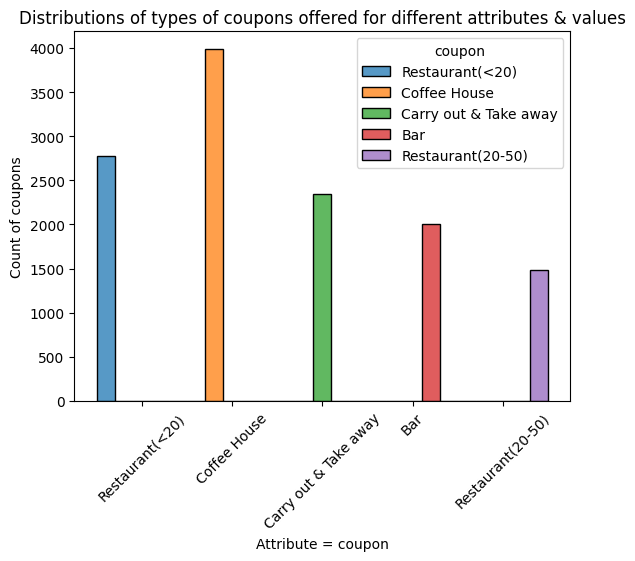

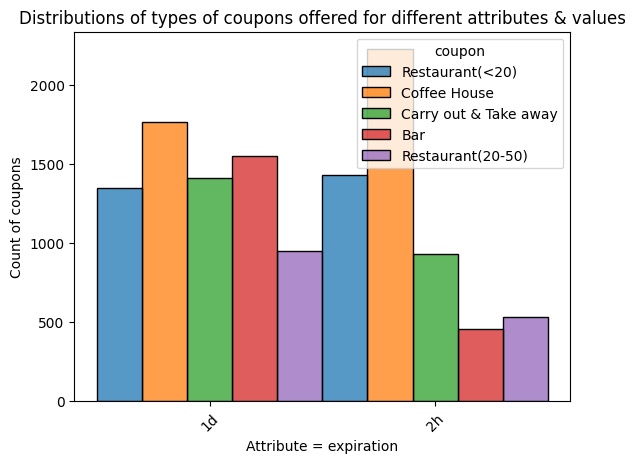

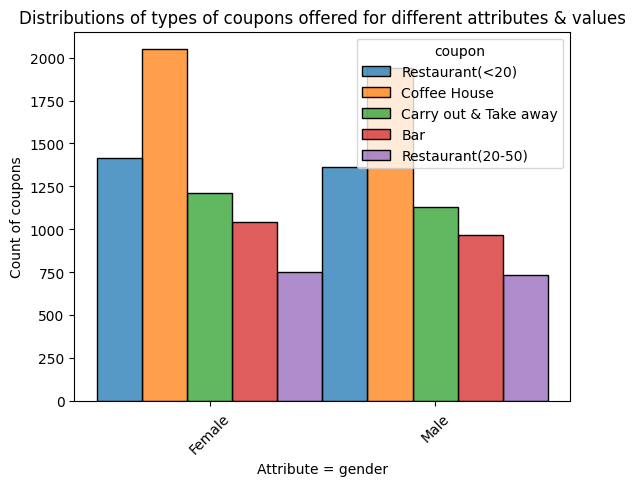

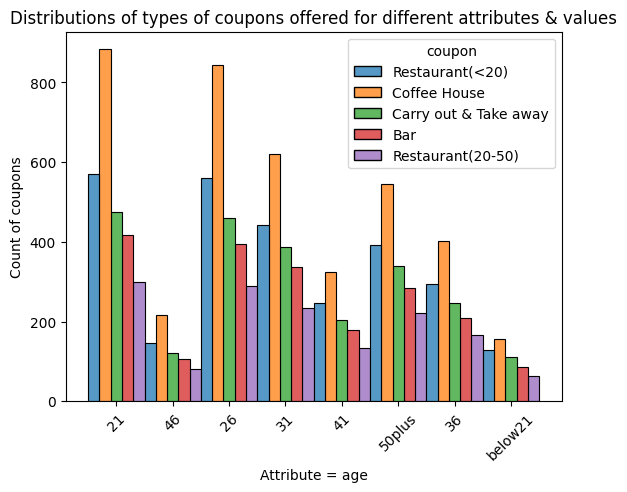

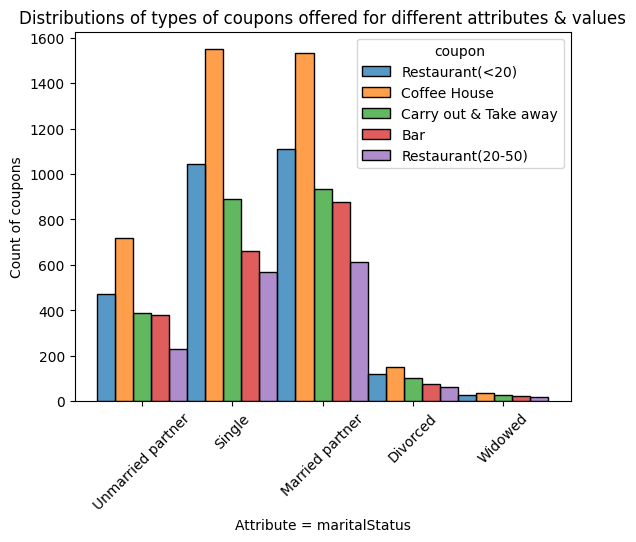

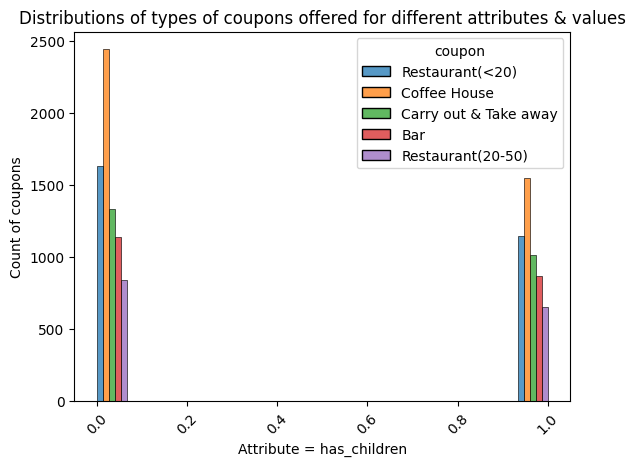

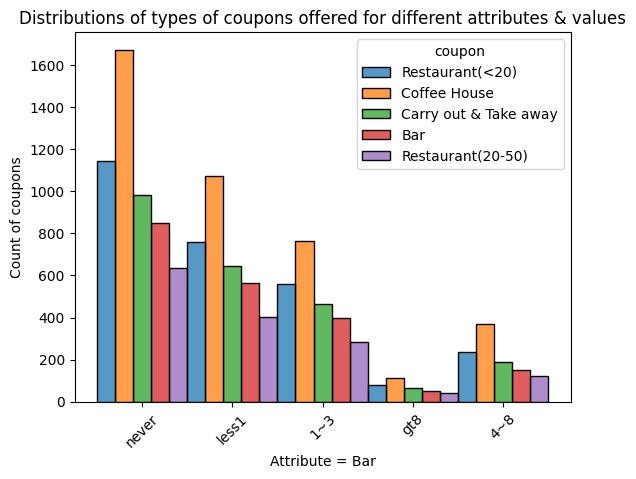

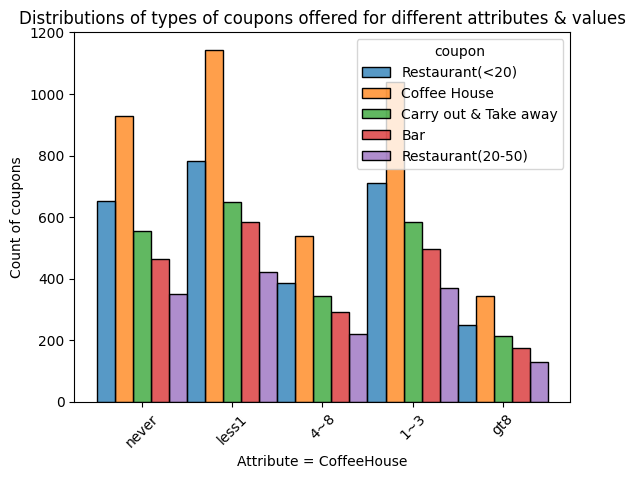

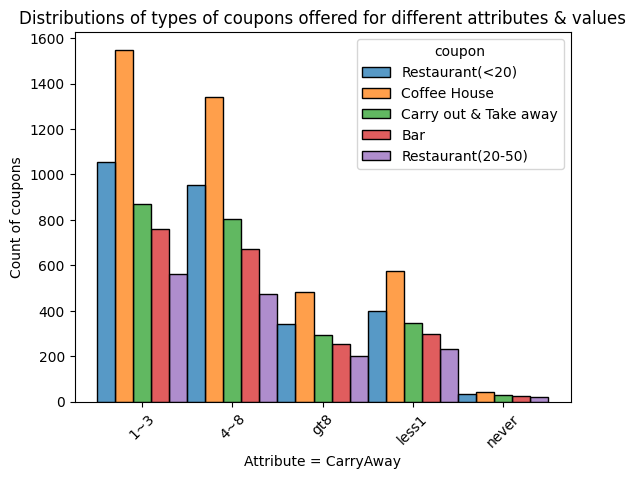

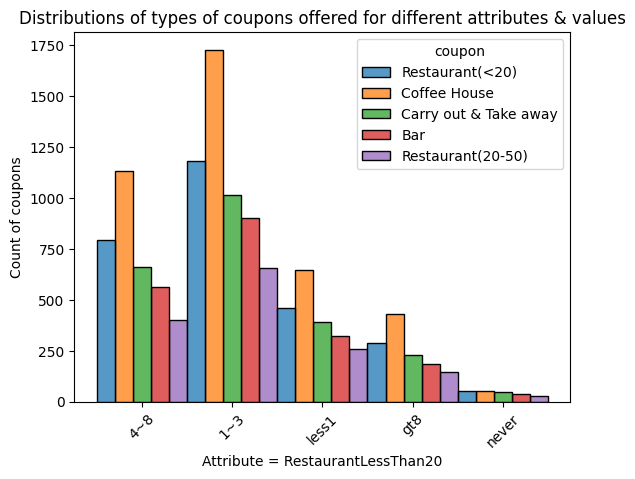

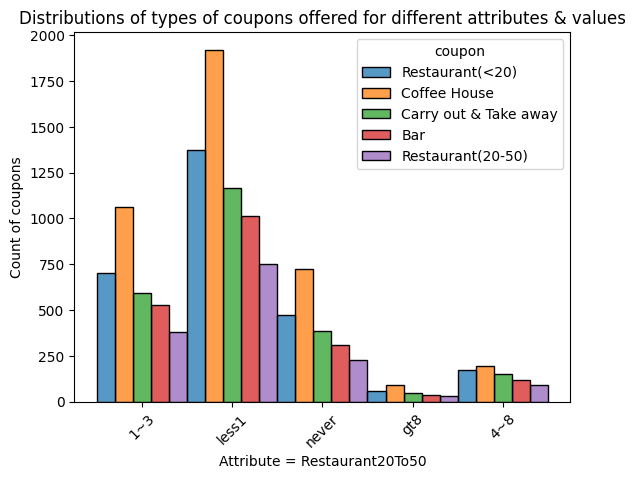

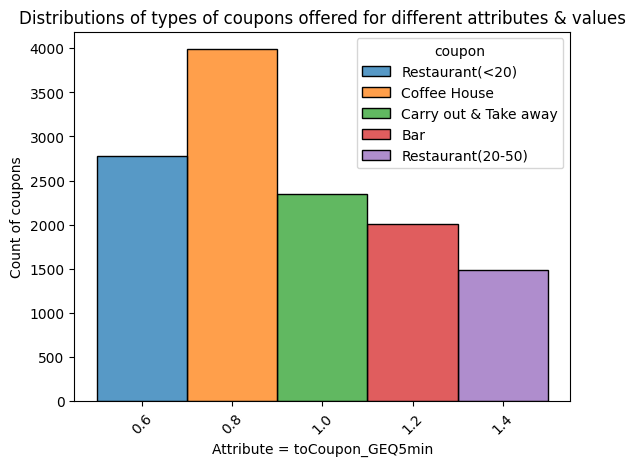

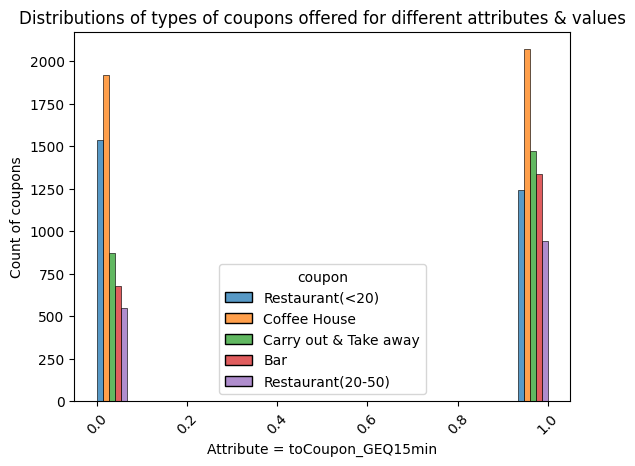

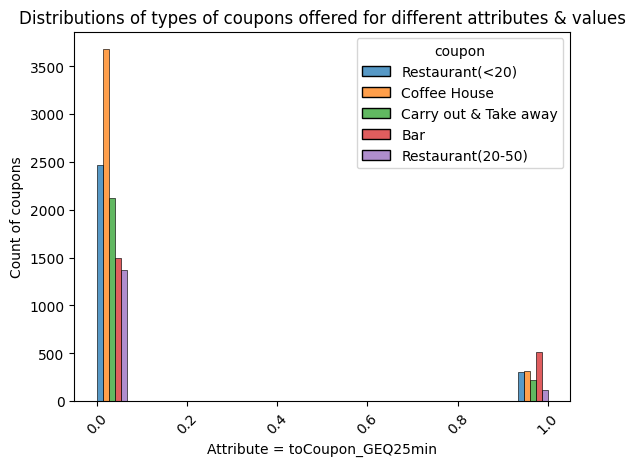

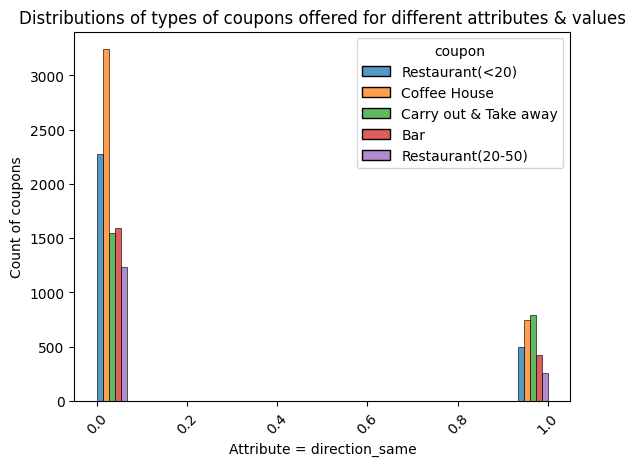

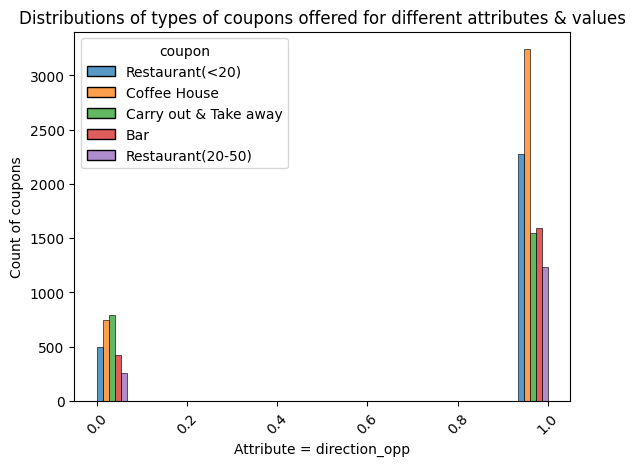

In [187]:
# Visualize coupons type distribution for each value of a given attribute

columns = [column for column in data.columns if column not in ["education", "income", "occupation", "Y"]]
for i in columns:
  sns.histplot(data = data, x = i, hue = "coupon", color = "brown", multiple = "dodge")
  plt.xlabel (f"Attribute = {i}")
  plt.xticks(rotation=45)
  plt.ylabel ("Count of coupons")
  plt.title("Distributions of types of coupons offered for different attributes & values")
  plt.show()
  print()

  ### The type of coupons was not consistently offered at the same rate for different features or driver attributes. This suggests that comparing the absolute rate of acceptance of coupons to each other might not be informative as they were not offered under the same exact conditions.
  ### Alternatively, for the rest of this analysis we will try to understand the impact of different driver/driving attributes on accepting a coupon for a given coupon type

****

**Coffee House Coupons: Will the driver accept?**

In [188]:
data_cof = data.query('coupon == "Coffee House"')
data_cof.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1304,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1~3,4~8,never,1,0,0,0,1,1
4765,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,50plus,Married partner,...,less1,less1,4~8,less1,1,1,0,0,1,1
10724,No Urgent Place,Friend(s),Sunny,80,10PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,never,1,1,0,0,1,1
5979,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,36,Married partner,...,less1,1~3,4~8,1~3,1,1,0,1,0,1
5409,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,26,Unmarried partner,...,1~3,1~3,1~3,1~3,1,1,0,1,0,0
5951,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,1~3,1,0,0,0,1,0
10104,No Urgent Place,Kid(s),Sunny,80,10AM,Coffee House,1d,Female,36,Married partner,...,4~8,4~8,4~8,1~3,1,0,0,0,1,1
4147,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,26,Married partner,...,gt8,4~8,gt8,1~3,1,1,0,1,0,1
3606,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,...,less1,less1,1~3,less1,1,0,0,0,1,1
2206,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,36,Married partner,...,never,4~8,4~8,1~3,1,0,0,0,1,0


In [189]:
# Total rate of acceptance of coffee house coupon
rate_total_cof = data_cof["Y"].mean()
print(f"Rate of coffee house coupon acceptance is: {rate_total_cof:.0%}")

Rate of coffee house coupon acceptance is: 50%


In [190]:
#Generate a table of probabilites of accepting coupons for each Attribute:value pair
probabilities = []
for col in data_cof.columns:
  if col != "Y" and col != "coupon":
    distvalues = data_cof[col].value_counts()
    for i in range(len(distvalues)):
      value = distvalues.index[i]
      P_value = round(data_cof[data_cof[col] == value]["Y"].mean(),2)
      probabilities.append({"Attribute": col, "Value": value, "Probabilities": P_value})


prob = pd.DataFrame(probabilities)
prob_sorted = prob.sort_values(by = "Probabilities", ascending = False)

## The Prob table lists out the probability of a driver with a certain attribute accepting a coupon. To better visulalize this, we leverage bar plots as shown below.

In [191]:
print (prob)

             Attribute            Value  Probabilities
0          destination  No Urgent Place           0.58
1          destination             Home           0.36
2          destination             Work           0.45
3            passanger            Alone           0.44
4            passanger        Friend(s)           0.60
..                 ...              ...            ...
106  toCoupon_GEQ25min                1           0.35
107     direction_same                0           0.49
108     direction_same                1           0.53
109      direction_opp                1           0.49
110      direction_opp                0           0.53

[111 rows x 3 columns]


In [192]:
#Here we generate an interactive bar plot using plotly
fig = px.bar(prob, x="Value", y="Probabilities", color="Attribute", facet_col="Attribute", facet_col_wrap=3, title="Probability of accepting Coffee House coupon by Attribute and Value", facet_col_spacing=0.02, facet_row_spacing=0.02)
fig.update_layout( height=2000, width=2000)
fig.show()

# Using Probability (accepting coupon) >= 0.65 as min treshhold, we identify using the graph and the narrowed table "prob", a list of attributes that stand out as key predictors of whether a driver will accept a coffee house:
prob_65 = prob[prob ["Probabilities"] >= 0.65]

In [193]:
prob_65

,Attribute,Value,Probabilities
29,age,below21,0.70
55,occupation,Healthcare Practitioners & Technical,0.74
66,occupation,Building & Grounds Cleaning & Maintenance,0.73
83,CoffeeHouse,1~3,0.65
85,CoffeeHouse,4~8,0.69
86,CoffeeHouse,gt8,0.66


*The table above shows some interesting attributes that pop up with high probability of accepting the coupon. Before we generalize findings, we aim to assess how big the sample size was for each of these attributes*

In [194]:
len(data_cof)

3989

In [195]:
#Append Sample size to each probability calculation
prob_65["Samplesize"]= 0
prob_65["Samplesize_percent"]= 0
prob_65 = prob_65.reset_index(drop = True)
for i in range(len(prob_65)):
  attribute = prob_65.iloc[i]["Attribute"]
  value = prob_65.iloc[i]["Value"]
  prob_65.loc[i,"Samplesize"] = len(data_cof[data_cof[attribute] == value])
  prob_65.loc[i, "Samplesize_percent"]= round(prob_65.loc[i,"Samplesize"] / (len(data_cof)),2)

prob_65

,Attribute,Value,Probabilities,Samplesize,Samplesize_percent
0,age,below21,0.70,155,0.04
1,occupation,Healthcare Practitioners & Technical,0.74,74,0.02
2,occupation,Building & Grounds Cleaning & Maintenance,0.73,11,0.00
3,CoffeeHouse,1~3,0.65,1038,0.26
4,CoffeeHouse,4~8,0.69,538,0.13
5,CoffeeHouse,gt8,0.66,342,0.09


In [196]:
#As shown in the updated table above, the sample size was too small for some type of attributes. We set here a treshold to drop probability assessments for attributes that have less than 100 respondants
prob_65 = prob_65[prob_65["Samplesize"] > 100]
prob_65

,Attribute,Value,Probabilities,Samplesize,Samplesize_percent
0,age,below21,0.70,155,0.04
3,CoffeeHouse,1~3,0.65,1038,0.26
4,CoffeeHouse,4~8,0.69,538,0.13
5,CoffeeHouse,gt8,0.66,342,0.09


**Using the table above and the graphics, we identify that drivers with the following characteristics are very likely to accept the coffee house coupon: driver is below 21, or frequents coffee houses at least once a month**

**   **

***Restaurant < 20 coupons: Will the driver accept?***

In [197]:
## Here we repeat the same process as above for a different type of coupon: Restaurant(<20)

In [198]:
#Understanding probability of accepting that coupon independent of driver characteristics

#Generating dataframe with data for that coupon only
data_r20 = data.query('coupon == "Restaurant(<20)"')
data_r20.sample(10)
len(data_r20)

# Total rate of acceptance of restaurant(<20) coupon
rate_total_r20 = data_r20["Y"].mean()
print(f"Rate of Restaurant(<20) coupon acceptance is: {rate_total_r20:.0%}")

Rate of Restaurant(<20) coupon acceptance is: 71%


In [199]:
#Creating a table with probabilites of restaurant(<20) acceptance for all attributes
probabilities_r20 = []
for col in data_r20.columns:
  if col != "Y" and col != "coupon":
    distvalues_r20 = data_r20[col].value_counts()
    for i in range(len(distvalues_r20)):
      value_r20 = distvalues_r20.index[i]
      P_value_r20 = round(data_r20[data_r20[col] == value_r20]["Y"].mean(),2)
      probabilities_r20.append({"Attribute": col, "Value": value_r20, "Probabilities": P_value_r20})


prob_r20 = pd.DataFrame(probabilities_r20)

#Filtering the table down to the attributes of highest acceptance rate with 0.65 used as treshhold
prob_r20_65 = prob_r20[prob_r20["Probabilities"] >= 0.65]
print(prob_r20_65)

             Attribute            Value  Probabilities
0          destination  No Urgent Place           0.79
4            passanger        Friend(s)           0.80
5            passanger           Kid(s)           0.72
6            passanger          Partner           0.77
7              weather            Sunny           0.77
..                 ...              ...            ...
103  toCoupon_GEQ15min                0           0.75
104  toCoupon_GEQ15min                1           0.65
105  toCoupon_GEQ25min                0           0.75
107     direction_same                0           0.72
109      direction_opp                1           0.72

[86 rows x 3 columns]


In [200]:
# Leveraging graphics to visualize probabilities of accepting coupons
fig_r20 = px.bar(prob_r20, x="Value", y="Probabilities", color="Attribute", facet_col="Attribute", facet_col_wrap=3, title="Probability of accepting Restaurant(<20) coupon by Attribute and Value", facet_col_spacing=0.02, facet_row_spacing=0.02)
fig_r20.update_layout( height=2000, width=2000)
fig_r20.show()

In [201]:
#Filtering out attributes that have high acceptance rate based on low sample size (<100)
prob_r20_65["Samplesize"]= 0
prob_r20_65["Samplesize_percent"]= 0
prob_r20_65 = prob_r20_65.reset_index(drop = True)
for i in range(len(prob_r20_65)):
  attribute = prob_r20_65.iloc[i]["Attribute"]
  value = prob_r20_65.iloc[i]["Value"]
  prob_r20_65.loc[i,"Samplesize"] = len(data_r20[data_r20[attribute] == value])
  prob_r20_65.loc[i, "Samplesize_percent"]= round(prob_r20_65.loc[i,"Samplesize"] / (len(data_r20)),2)

prob_r20_65 = prob_r20_65[prob_r20_65["Samplesize"] > 100]
prob_r20_65

,Attribute,Value,Probabilities,Samplesize,Samplesize_percent
0,destination,No Urgent Place,0.79,1714,0.62
1,passanger,Friend(s),0.80,826,0.30
2,passanger,Kid(s),0.72,267,0.10
3,passanger,Partner,0.77,256,0.09
4,weather,Sunny,0.77,2237,0.80
...,...,...,...,...,...
81,toCoupon_GEQ15min,0,0.75,1538,0.55
82,toCoupon_GEQ15min,1,0.65,1241,0.45
83,toCoupon_GEQ25min,0,0.75,2472,0.89
84,direction_same,0,0.72,2279,0.82


In [202]:
#For this type of coupon and given how high in general the acceptance rate is, we explore additional features that drive acceptance rate to 80%+
probe_r20_80 = prob_r20_65 [ prob_r20_65["Probabilities"] > 0.79]
probe_r20_80

,Attribute,Value,Probabilities,Samplesize,Samplesize_percent
1,passanger,Friend(s),0.80,826,0.30
7,time,6PM,0.83,748,0.27
8,time,2PM,0.81,696,0.25
10,expiration,1d,0.83,1351,0.49
33,occupation,Sales & Related,0.80,238,0.09


**As shown in the analysis above of the Restaurant(<20) coupons, we see that likelihood of accepting a restaurant(20) coupon is fairly high to begin with at 71%. For the majority of driver attributes and driving conditions (71 attributes), the driver accepts the coupon at a rate > 0.65 (sample size at least 100 drivers).**

Given the very high acceptance rate of this coupon, we also explored features for which acceptance is 80%+. Few features stand out with very high acceptance rates including: driver has a friend passenger, or time is in the afternoon, expiration is in 1d or driver works in sales & related fields

**     **

***Restaurant (20-50) coupons: Will the driver accept?***

In [203]:
#Understanding prob of accepting that coupon independent of driver characteristics

#Generating dataframe with data for that coupon only
data_r50 = data.query('coupon == "Restaurant(20-50)"')
data_r50.sample(10)
len(data_r50)

# Total rate of acceptance of restaurant(<20) coupon
rate_total_r50 = data_r50["Y"].mean()
print(f"Rate of Restaurant(20-50) coupon acceptance is: {rate_total_r50:.0%}")

Rate of Restaurant(20-50) coupon acceptance is: 44%


In [204]:
#Creating a table with probabilites of restaurant(20-50) acceptance for all attributes
probabilities_r50 = []
for col in data_r50.columns:
  if col != "Y" and col != "coupon":
    distvalues_r50 = data_r50[col].value_counts()
    for i in range(len(distvalues_r50)):
      value_r50 = distvalues_r50.index[i]
      P_value_r50 = round(data_r50[data_r50[col] == value_r50]["Y"].mean(),2)
      probabilities_r50.append({"Attribute": col, "Value": value_r50, "Probabilities": P_value_r50})


prob_r50 = pd.DataFrame(probabilities_r50)

#Filtering the table down to the attributes of highest acceptance rate with 0.65 used as treshhold
prob_r50_65 = prob_r50[prob_r50["Probabilities"] >= 0.65]
print(prob_r50_65)

            Attribute               Value  Probabilities
55         occupation  Healthcare Support           0.66
101  Restaurant20To50                 gt8           0.69


In [205]:
#Visualizing probabilities of accepting coupon per attribute and value
fig_r50 = px.bar(prob_r50, x="Value", y="Probabilities", color="Attribute", facet_col="Attribute", facet_col_wrap=3, title="Probability of accepting Restaurant(20-50) coupon by Attribute and Value", facet_col_spacing=0.02, facet_row_spacing=0.02)
fig_r50.update_layout( height=2000, width=2000)
fig_r50.show()

In [206]:
#Filtering out attributes that have high acceptance rate based on low sample size (<100)
prob_r50_65["Samplesize"]= 0
prob_r50_65["Samplesize_percent"]= 0
prob_r50_65 = prob_r50_65.reset_index(drop = True)
for i in range(len(prob_r50_65)):
  attribute = prob_r50_65.iloc[i]["Attribute"]
  value = prob_r50_65.iloc[i]["Value"]
  prob_r50_65.loc[i,"Samplesize"] = len(data_r50[data_r50[attribute] == value])
  prob_r50_65.loc[i, "Samplesize_percent"]= round(prob_r50_65.loc[i,"Samplesize"] / (len(data_r50)),2)

#prob_r50_65 = prob_r50_65[prob_r50_65["Samplesize"] > 100]
prob_r50_65


,Attribute,Value,Probabilities,Samplesize,Samplesize_percent
0,occupation,Healthcare Support,0.66,32,0.02
1,Restaurant20To50,gt8,0.69,32,0.02


**In summary, Restaurants (20-50) coupons have low acceptance rates. While those that go to restaurant (20-50) more than 8 times or work in healthcare support have higher acceptance rates, the sample size is so low that it is challenging to draw conclusive answers.**

**     **

***Carry out & Take away coupons: Will the driver accept?***

In [207]:
#Understanding prob of accepting that coupon independent of driver characteristics

#Generating dataframe with data for that coupon only
data_carryout = data.query('coupon == "Carry out & Take away"')
data_carryout.sample(10)

# Total rate of acceptance of restaurant(<20) coupon
rate_total_carryout = data_carryout["Y"].mean()
print(f"Rate of Restaurant(20-50) coupon acceptance is: {rate_total_carryout:.0%}")

Rate of Restaurant(20-50) coupon acceptance is: 73%


In [208]:
#Creating a table with probabilites of restaurant(20-50) acceptance for all attributes
probabilities_carryout = []
for col in data_carryout.columns:
  if col != "Y" and col != "coupon":
    distvalues_carryout = data_carryout[col].value_counts()
    for i in range(len(distvalues_carryout)):
      value_carryout = distvalues_carryout.index[i]
      P_value_carryout = round(data_carryout[data_carryout[col] == value_carryout]["Y"].mean(),2)
      probabilities_carryout.append({"Attribute": col, "Value": value_carryout, "Probabilities": P_value_carryout})


prob_carryout = pd.DataFrame(probabilities_carryout)

#Filtering the table down to the attributes of highest acceptance rate with 0.65 used as treshhold
prob_carryout_65 = prob_carryout[prob_carryout["Probabilities"] >= 0.65]
print(prob_carryout_65)

#Filtering out attributes that have high acceptance rate based on low sample size (<100)
prob_carryout_65["Samplesize"]= 0
prob_carryout_65["Samplesize_percent"]= 0
prob_carryout_65 = prob_carryout_65.reset_index(drop = True)
for i in range(len(prob_carryout_65)):
  attribute = prob_carryout_65.iloc[i]["Attribute"]
  value = prob_carryout_65.iloc[i]["Value"]
  prob_carryout_65.loc[i,"Samplesize"] = len(data_carryout[data_carryout[attribute] == value])
  prob_carryout_65.loc[i, "Samplesize_percent"]= round(prob_carryout_65.loc[i,"Samplesize"] / (len(data_carryout)),2)

prob_carryout_65 = prob_carryout_65[prob_carryout_65["Samplesize"] > 100]
prob_carryout_65



             Attribute            Value  Probabilities
0          destination  No Urgent Place           0.76
1          destination             Work           0.65
2          destination             Home           0.79
3            passanger            Alone           0.73
4            passanger        Friend(s)           0.76
..                 ...              ...            ...
106  toCoupon_GEQ25min                1           0.72
107     direction_same                0           0.75
108     direction_same                1           0.70
109      direction_opp                1           0.75
110      direction_opp                0           0.70

[102 rows x 3 columns]


,Attribute,Value,Probabilities,Samplesize,Samplesize_percent
0,destination,No Urgent Place,0.76,974,0.42
1,destination,Work,0.65,719,0.31
2,destination,Home,0.79,651,0.28
3,passanger,Alone,0.73,1361,0.58
4,passanger,Friend(s),0.76,737,0.31
...,...,...,...,...,...
97,toCoupon_GEQ25min,1,0.72,222,0.09
98,direction_same,0,0.75,1552,0.66
99,direction_same,1,0.70,792,0.34
100,direction_opp,1,0.75,1552,0.66


In [209]:
#Visualizing probabilities of accepting coupon per attribute and value
fig_carryout = px.bar(prob_carryout, x="Value", y="Probabilities", color="Attribute", facet_col="Attribute", facet_col_wrap=3, title="Probability of accepting Carry out & Take away coupon by Attribute and Value", facet_col_spacing=0.02, facet_row_spacing=0.02)
fig_carryout.update_layout( height=2000, width=2000)
fig_carryout.show()

In [210]:
#Given the very high acceptance rate of this coupon across attributes, we explore additional features that drive acceptance rate to 80%+
prob_carryout_80 = prob_carryout_65 [ prob_carryout_65["Probabilities"] > 0.79]
prob_carryout_80

,Attribute,Value,Probabilities,Samplesize,Samplesize_percent
15,time,6PM,0.82,433,0.18
16,time,2PM,0.87,218,0.09
38,education,Associates degree,0.82,214,0.09
48,occupation,Business & Financial,0.82,103,0.04


**Similar to Restaurant(<20) coupons, the Carry out & Take away coupons have a very high likelihood of acceptance (73%).**

Given the very high acceptance rate of this coupon across several driver attributes, we also explored features for which acceptance is 80%+. Few features stand out with very high acceptance rates including: driver has an associate degree,  or time is in the afternoon, or driver works in Business & Financial sector
